# **Assignment 1 – Simple Linear Regression**
**Goal:** Understand the basics of regression by creating your own dataset.

### Steps:
1. Formulate your own equation in the form:  
   $
   y = m x + c
   $
   
   Example: $y = 2x + 3$
2. Generate X values (at least 100 numbers between your chosen range).
3. Generate Y values using your equation.
4. Add small random noise to Y to make it realistic.
5. Split data into train and test splits
6. Fit a Simple Linear Regression model.
7. Print learned coefficient and intercept.
8. Split the data into train and test sets (80%-20%).
9. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.
10. Visualize the points and the fitted line.


In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [69]:
X=np.linspace(0,50,100).reshape(-1,1)
y=2*X+7

In [70]:
# adding noise
np.random.seed(1)
noise=np.random.randn(100,1)*9
y = (2*X+7)+ noise

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [72]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [73]:
print("Coefficient (slope):", model.coef_[0][0])
print("Intercept:", model.intercept_[0])

Coefficient (slope): 2.08901292418042
Intercept: 6.0517729272385665


In [74]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [75]:
print("Train MAE:", mean_absolute_error(y_train, y_pred_train))
print("Train MSE:", mean_squared_error(y_train, y_pred_train))
print("Train R²:", r2_score(y_train, y_pred_train))

Train MAE: 6.346198149374251
Train MSE: 65.44745133323889
Train R²: 0.9369403649401663


In [76]:
print("Test MAE:", mean_absolute_error(y_test, y_pred_test))
print("Test MSE:", mean_squared_error(y_test, y_pred_test))
print("Test R²:", r2_score(y_test, y_pred_test))

Test MAE: 6.210503663224285
Test MSE: 55.359864546060315
Test R²: 0.9145486807441325


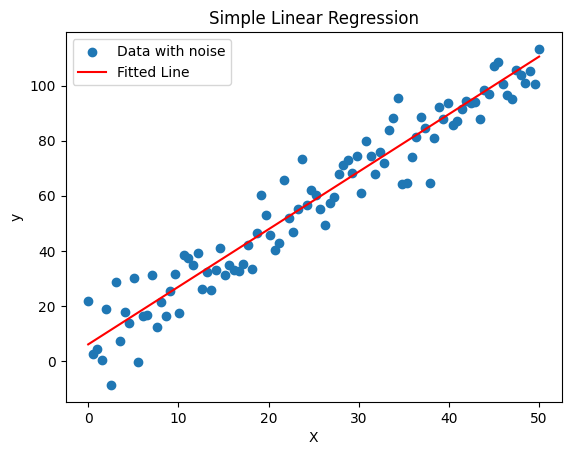

In [77]:
plt.scatter(X, y, label="Data with noise")
plt.plot(X, model.predict(X), color="red", label="Fitted Line")
plt.title("Simple Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# **Assignment 2 – Multiple Linear Regression**
**Goal:** See how multiple features affect predictions.

### Steps:
1. Formulate your own equation:
   $
   y = a_1 x_1 + a_2 x_2 + c
   $
2. Generate `x1` and `x2` values (at least 100 numbers each).
3. Generate Y values with noise.
4. Split data into train and test splits
5. Fit a Multiple Linear Regression model.
6. Compare coefficients and intercept to your original equation.
7. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.



In [78]:
# coefficients
a1 = 2.0
a2 = 3.0
c  = 5.0

np.random.seed(1)
X1=np.linspace(0,50,100)
X2=np.linspace(10,60,100)
y = a1 * X1 + a2 * X2 + c

In [79]:
noise=np.random.randn(100)* 7
y = (a1 * X1 + a2 * X2 + c)+ noise

In [80]:
X = np.column_stack([X1, X2])
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [81]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [82]:
print("Original:  a1=%.1f, a2=%.1f, c=%.1f" % (a1, a2, c))
print("Learned coefficients [x1, x2]:", model.coef_)
print("Learned intercept:", model.intercept_)

Original:  a1=2.0, a2=3.0, c=5.0
Learned coefficients [x1, x2]: [2.53461614 2.53461614]
Learned intercept: 8.916328682706109


In [88]:
y_train_pred = model.predict(X_train)
y_test_pred  = model.predict(X_test)

# metrics (lower is better for MAE/MSE, higher is better for R^2)
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Train R² :", r2_score(y_train, y_train_pred))

Train MAE: 4.935931893957751
Train MSE: 39.59166809047785
Train R² : 0.993133175850488


In [89]:
print("\nTest MAE:", mean_absolute_error(y_test, y_test_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Test R² :", r2_score(y_test, y_test_pred))


Test MAE: 4.830391738063327
Test MSE: 33.489300774777206
Test R² : 0.9914304602981162


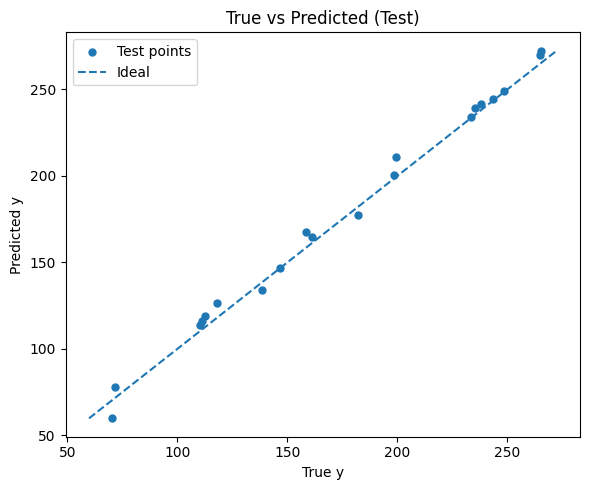

In [90]:
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_test_pred, s=25, label="Test points")
# ideal line (perfect predictions)
min_v = min(y_test.min(), y_test_pred.min())
max_v = max(y_test.max(), y_test_pred.max())
plt.plot([min_v, max_v], [min_v, max_v], linestyle="--", label="Ideal")
plt.title("True vs Predicted (Test)")
plt.xlabel("True y")
plt.ylabel("Predicted y")
plt.legend()
plt.tight_layout()
plt.show()

### Notes
- The learned coefficients are close to the original (a1 ~ 2, a2 ~ 3, c ~ 5).
- Train and Test R² are both high and similar → good generalization.
- No clear overfitting (train >> test) and no underfitting (both poor).
- Noise explains small differences from the exact equation.


# **Assignment 3 – Polynomial Regression**
**Goal:** Model non-linear relationships.

### Steps:
1. Formulate your own equation:
   $
   y = ax^2 + bx + c
   $
2. Generate X values and Y values with noise.
3. Use `PolynomialFeatures` to transform X.
4. Split the data into train and test sets (80%-20%).
5. Fit a Linear Regression model on transformed features.
6. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.



In [91]:
from sklearn.preprocessing import PolynomialFeatures

In [92]:
np.random.seed(1)
X=np.linspace(0,20,100)
y= 0.5 *(X**2) + (2 * X) + 3

noise = np.random.randn(100) * 10
y = y + noise
X = X.reshape(-1, 1)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [94]:
poly=PolynomialFeatures(degree=2)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [95]:
model=LinearRegression()
model.fit(X_train_poly,y_train)

LinearRegression()

In [97]:
y_train_pred=model.predict(X_train_poly)
y_test_pred=model.predict(X_test_poly)

In [98]:
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_test_pred))

Train MAE: 6.49091873210674
Test MAE: 8.2907658110401
Train MSE: 73.7473479513031
Test MSE: 104.0584392063814
Train R²: 0.9866938875552553
Test R²: 0.9757666604704738


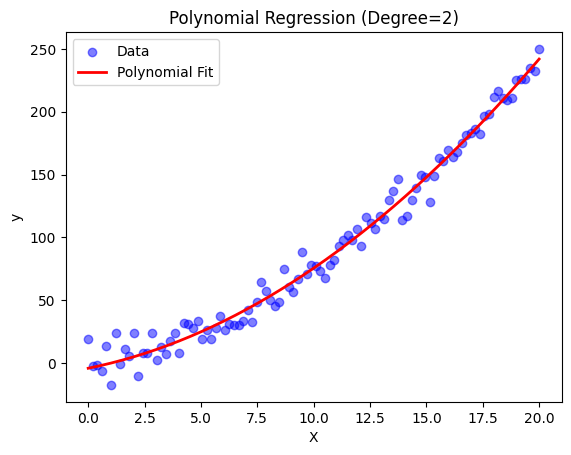

In [103]:
plt.scatter(X, y,color='blue', alpha=.5 ,label="Data")

X_curve = np.linspace(0, 20, 200).reshape(-1,1)
X_curve_poly = poly.transform(X_curve)
y_curve = model.predict(X_curve_poly)

plt.plot(X_curve, y_curve, color="red", linewidth=2, label="Polynomial Fit")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Polynomial Regression (Degree=2)")
plt.legend()
plt.show()

## Machine Learning Project Pipeline

### 1. **Exploratory Data Analysis (EDA)**
- Inspect dataset structure (`.info()`, `.describe()`)
- Check for missing values and duplicates
- Understand feature types (numeric, categorical, datetime, etc.)
- Visualize data distributions (histograms, boxplots, bar charts)
- Identify correlations between features and target
- Detect outliers and anomalies

---

### 2. **Data Cleaning**
- Handle missing values (drop, fill with mean/median/mode, or use predictive imputation)
- Remove duplicates
- Fix inconsistent data formats (e.g., date parsing, string trimming)
- Correct data entry errors or outliers (if verified)

---

### 3. **Data Pre-processing**
- Convert data types if necessary (e.g., `object` to `datetime` or numeric)
- Handle categorical variables:
  - **Encoding**:
    - One-Hot Encoding (for nominal categories)
    - Ordinal Encoding (for ordered categories)
- Verify numeric features:
  - Check for incorrect values (e.g., negative ages)
  - Apply transformations if needed (e.g., log transform for skewed data)

---

### 4. **Scaling Numeric Features**
- Standardization (`StandardScaler`) — mean = 0, std = 1
- Normalization (`MinMaxScaler`) — values between 0 and 1
- Robust Scaling (less sensitive to outliers)

---

### 5. **Splitting Data**
- **Train-Test Split**
  - Typically 70–80% for training, 20–30% for testing
  - Use `train_test_split` from `sklearn`
  - Set `random_state` for reproducibility
- Optional: create a **validation set** for model tuning

---

### 6. **Modeling**
- Choose model type based on task:
  - **Regression:** Linear Regression
- Train the model on training data (Your target is `price`)

---

### 7. **Evaluating the Model**
- **On Training Data**:
  - Evaluate for underfitting (low train performance)
- **On Testing Data**:
  - Evaluate for overfitting (high train, low test performance)
- Metrics:
  - **Regression:** MAE, MSE, RMSE, R²

---

### 8. **Final Steps**
- Save the model (`joblib` or `pickle`)



In [83]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("rohitgrewal/airlines-flights-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/airlines-flights-data


In [84]:
os.listdir(path)

['airlines_flights_data.csv']

In [85]:
full_path = os.path.join(path,os.listdir(path)[0])

In [86]:
import pandas as pd
df = pd.read_csv(full_path)

In [87]:
df

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


## OPTIONAL SUGGESTIONS for Visualizations for Flight Price Dataset
> **YOU MUST MAKE VISUALIZATIONS. THESE ARE ONLY SUGGESTIONS**
### 1. **Numeric Data Visualizations**
(Columns: `duration`, `days_left`, `price`)

**a. Distribution of Numeric Features**
- **Histograms / KDE plots**  
  - Price distribution — check for skewness.  
  - Duration distribution — detect common flight lengths.  
  - Days left — reveal booking patterns.

**b. Boxplots for Outlier Detection**
- Boxplot of `price` — spot extreme values.
- Boxplot of `duration` grouped by `class` or `airline`.

**c. Price vs Numeric Feature Relationships**
- Scatter plot: `price` vs `duration` (color by `class` or `airline`).
- Scatter plot: `price` vs `days_left` (color by `class` or `stops`).

---

### 2. **Categorical Data Visualizations**
(Columns: `airline`, `flight`, `source_city`, `departure_time`, `stops`, `arrival_time`, `destination_city`, `class`)

**a. Price Trends by Category**
- **Boxplots**
  - `price` by `airline` — compare average fares.
  - `price` by `source_city` or `destination_city`.
  - `price` by `stops` — direct vs connecting flights.

**b. Frequency Counts**
- Bar plots of `airline` frequency — market share.
- Bar plots of `source_city` and `destination_city` — most common routes.
- Bar plots of `departure_time` (morning, afternoon, evening, night) — popular times.

**c. Grouped Statistics**
- Mean `price` by `airline` and `class` — grouped bar plots.
- Mean `price` by `(source_city, destination_city)` pairs.

---

### 3. **Mixed Insights**

**a. Heatmaps / Pivot Tables**
- Pivot table: average `price` for each `(source_city, destination_city)` pair — show as heatmap.
- Pivot table: average `price` for each `(airline, class)` — reveal premium vs economy gap.

**b. Correlation Heatmap (Numeric Only)**
- Show correlation between `duration`, `days_left`, and `price`.

---
*These visualizations can reveal pricing patterns, airline competitiveness, route popularity, and booking behavior trends.*


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [108]:
df.isna().sum()

,0
index,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0


In [107]:
df.duplicated().sum()
# no missing or duplicated values

np.int64(0)

In [105]:
df.describe()

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


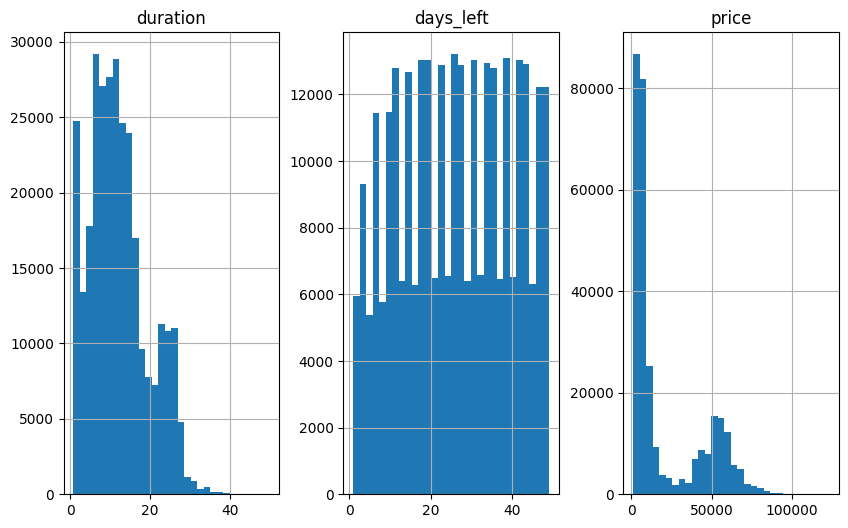

In [117]:
numeric_cols = ['duration', 'days_left', 'price']
df[numeric_cols].hist(bins=30, figsize=(10, 6), layout=(1, 3))
plt.tight_layout
plt.show()

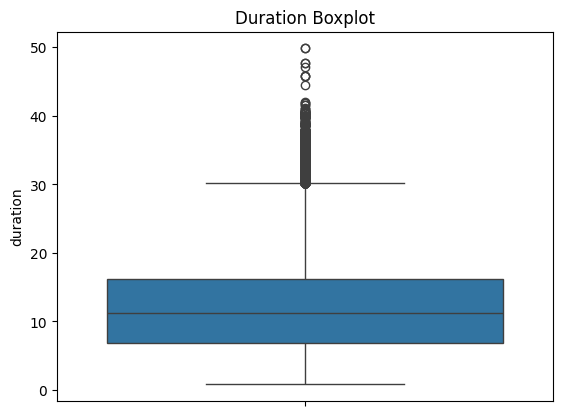

In [120]:
import seaborn as sns
sns.boxplot(y=df['duration'])
plt.title("Duration Boxplot")
plt.show()

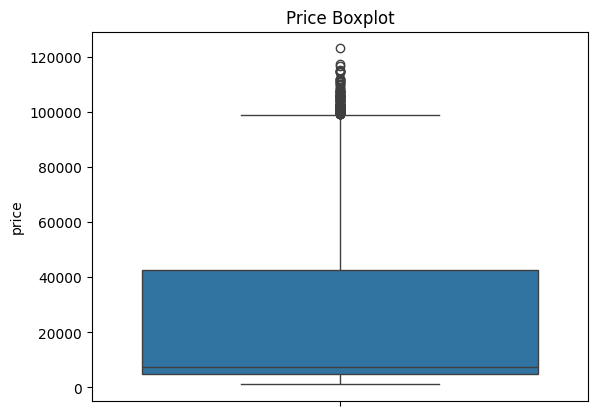

In [124]:
sns.boxplot(y=df['price'])
plt.title("Price Boxplot")
plt.show()

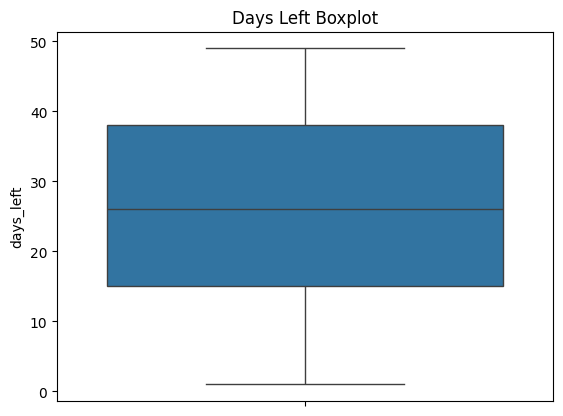

In [122]:
sns.boxplot(y=df['days_left'])
plt.title("Days Left Boxplot")
plt.show()

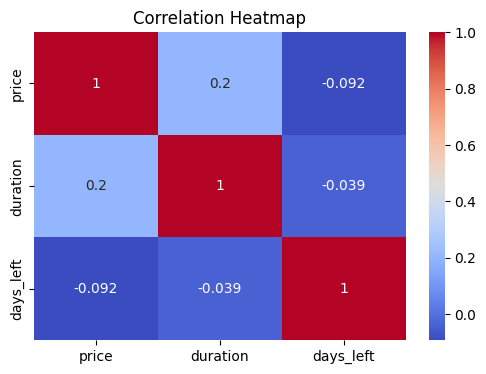

In [125]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['price','duration','days_left']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

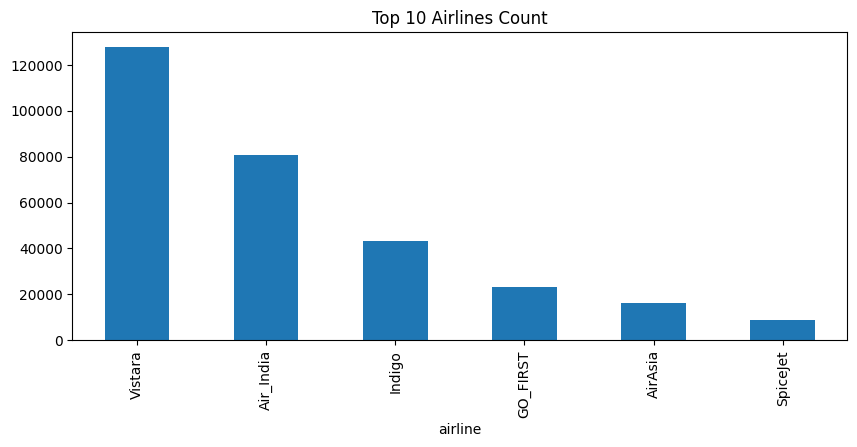

In [126]:
plt.figure(figsize=(10,4))
df['airline'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Airlines Count")
plt.show()

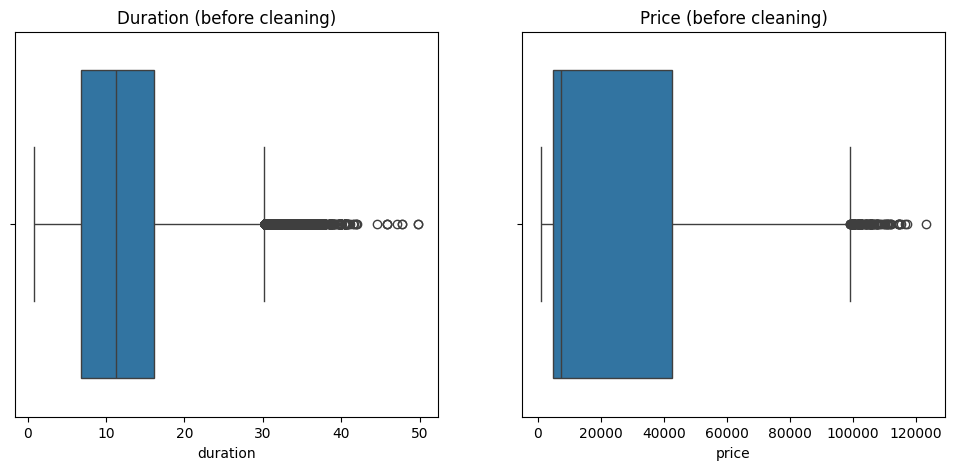

In [127]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x=df['duration'])
plt.title("Duration (before cleaning)")

plt.subplot(1,2,2)
sns.boxplot(x=df['price'])
plt.title("Price (before cleaning)")

plt.show()

In [133]:
df = df[df['duration'] <= 26]
df = df[df['price'] <= 10000]
df.shape

(167274, 12)

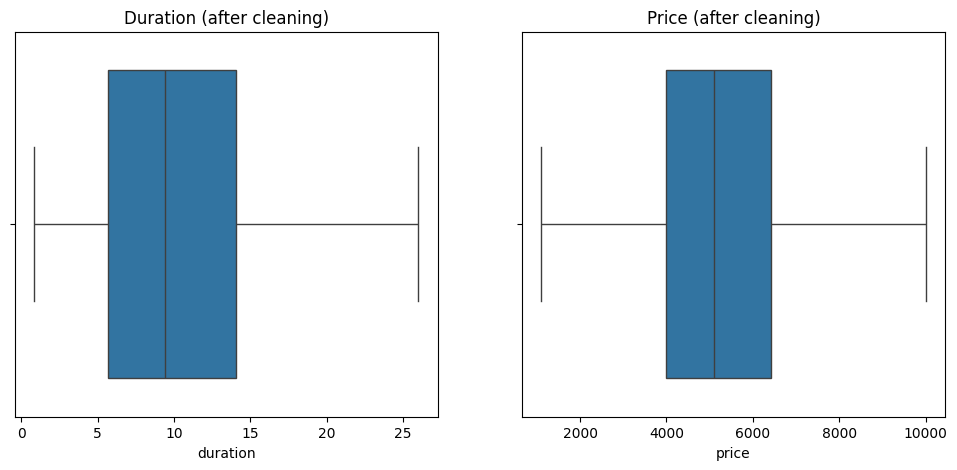

In [132]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x=df['duration'])
plt.title("Duration (after cleaning)")

plt.subplot(1,2,2)
sns.boxplot(x=df['price'])
plt.title("Price (after cleaning)")

plt.show()

In [142]:
df[['duration','price']].describe()

,duration,price
count,167274.000000,167274.000000
mean,10.321463,5210.668741
std,6.303942,1895.814085
min,0.830000,1105.000000
25%,5.670000,3980.000000
50%,9.420000,5104.000000
75%,14.080000,6431.000000
max,26.000000,10000.000000


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167274 entries, 0 to 206665
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             167274 non-null  int64  
 1   airline           167274 non-null  object 
 2   flight            167274 non-null  object 
 3   source_city       167274 non-null  object 
 4   departure_time    167274 non-null  object 
 5   stops             167274 non-null  object 
 6   arrival_time      167274 non-null  object 
 7   destination_city  167274 non-null  object 
 8   class             167274 non-null  object 
 9   duration          167274 non-null  float64
 10  days_left         167274 non-null  int64  
 11  price             167274 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 16.6+ MB


In [143]:
from sklearn.preprocessing import StandardScaler
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
num_cols.remove('price')   # price => target

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df[num_cols].head()

,index,duration,days_left
0,-1.717049,-1.293078,-2.301719
1,-1.717033,-1.267697,-2.301719
2,-1.717016,-1.293078,-2.301719
3,-1.716999,-1.280387,-2.301719
4,-1.716982,-1.267697,-2.301719


In [166]:
# 1- Drop irrelevant columns (safe)
df = df.drop(columns=[c for c in ['flight', 'index'] if c in df.columns])

# - Separate categorical & numerical features
categorical_cols = df.select_dtypes(include=['object']).columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('price')

In [167]:
# - One-Hot Encoding for categorical
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 6- Scale numerical features
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [168]:
# 7- Split X, y
X = df.drop('price', axis=1)
y = df['price']

# 8- Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [169]:
model = LinearRegression()
model.fit(X_train, y_train)

# 2- Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [170]:
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

In [171]:
print(f"Train MAE: {train_mae:.2f}")
print(f"Test MAE: {test_mae:.2f}")
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")

Train MAE: 1128.26
Test MAE: 1133.42
Train RMSE: 1416.26
Test RMSE: 1422.29
Train R²: 0.4388
Test R²: 0.4435


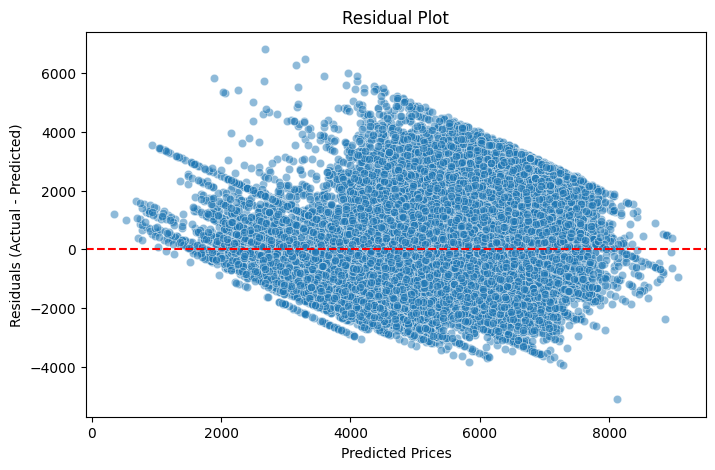

In [172]:
residuals = y_test - y_test_pred

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test_pred, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()